# GLASS CLASSIFICATION

## Importing required libraries

In [30]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#importing warnings
import warnings
warnings.filterwarnings('ignore')


#importing model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.model_selection import GridSearchCV


#importing all the machine learning models
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


#defining metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report


#for saving our model
import joblib




In [9]:
#Reading required data from github
glass_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
glass_data

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [6]:
#selecting top 10 rows
glass_data.head(10)

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
6,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
7,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
8,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1
9,11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.0,0.24,1


In [10]:
#Assigning column names to our dataset 
glass_data.columns=['Id number','refractive index','Na','Mg','Al','Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of Glass']

In [12]:
#checking random 10 numbers 
glass_data.sample(10)

,Id number,refractive index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
112,114,1.51892,13.46,3.83,1.26,72.55,0.57,8.21,0.00,0.14,2
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
152,154,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.00,0.00,3
32,34,1.51753,12.57,3.47,1.38,73.39,0.60,8.55,0.00,0.06,1
89,91,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22,2
197,199,1.51531,14.38,0.00,2.66,73.10,0.04,9.08,0.64,0.00,7
78,80,1.51590,12.82,3.52,1.90,72.86,0.69,7.97,0.00,0.00,2
61,63,1.52172,13.51,3.86,0.88,71.79,0.23,9.54,0.00,0.11,1
63,65,1.52172,13.48,3.74,0.90,72.01,0.18,9.61,0.00,0.07,1
51,53,1.51808,13.43,2.87,1.19,72.84,0.55,9.03,0.00,0.00,1


We have assigned column names to our dataset successfully

In [13]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id number         213 non-null    int64  
 1   refractive index  213 non-null    float64
 2   Na                213 non-null    float64
 3   Mg                213 non-null    float64
 4   Al                213 non-null    float64
 5   Si                213 non-null    float64
 6   K                 213 non-null    float64
 7   Ca                213 non-null    float64
 8   Ba                213 non-null    float64
 9   Fe                213 non-null    float64
 10  Type of Glass     213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


Our dataset has 11 columns including type of glass, with Id and type of glass having integer values while all other columns has float values.

As we can see non-null count of our data is equal in every column that means no null values are present in our dataset but to make it clear lets check it once again

In [15]:
#checking null values
glass_data.isnull()

,Id number,refractive index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
208,False,False,False,False,False,False,False,False,False,False,False
209,False,False,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False,False


In [17]:
glass_data.isnull().sum()

Id number           0
refractive index    0
Na                  0
Mg                  0
Al                  0
Si                  0
K                   0
Ca                  0
Ba                  0
Fe                  0
Type of Glass       0
dtype: int64

<AxesSubplot:>

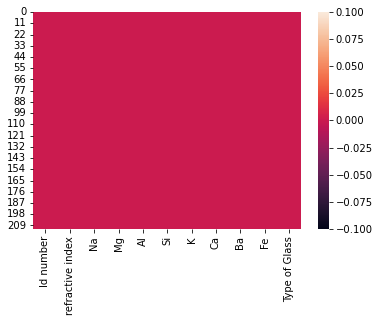

In [31]:
sns.heatmap(glass_data.isnull())

There is no null value present in our dataset

In [21]:
glass_data.shape

(213, 11)

### A brief discription of our dataset

Our dataset has 213 rows and 11 columns.

Attribute Information-

Id number

RI: refractive indexNa: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

Al: Aluminum

Si: Silicon

K: Potassium

Ca: Calcium

Ba: Barium

Fe: Iron



Type of glass: (class attribute)

1- building_windows_float_processed

2- building_windows_non_float_processed

3- vehicle_windows_float_processed

4- vehicle_windows_non_float_processed (none in this database)

5- containers

6- tableware

7- headlamps

There are 213 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


In [32]:
glass_data.describe()

,Id number,refractive index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [33]:
#checking the skewness in our data
glass_data.skew()

Id number           0.000000
refractive index    1.639658
Na                  0.457318
Mg                 -1.154323
Al                  0.900017
Si                 -0.744546
K                   6.549276
Ca                  2.040591
Ba                  3.406749
Fe                  1.747173
Type of Glass       1.108861
dtype: float64

<AxesSubplot:>

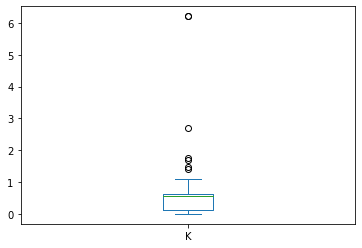

In [34]:
#displaying the outliers of columns having high skewness by plotting box plot
glass_data['K'].plot.box()

<AxesSubplot:>

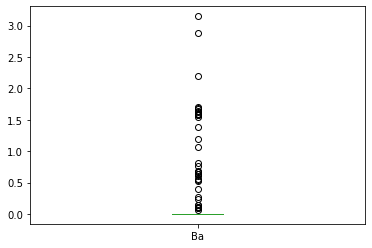

In [35]:
glass_data['Ba'].plot.box()

In [38]:
#glass_data.plot?

In [39]:
#removing outliers by using zscore
#zscore is one of the library present inside scipy.statistics by which we can remove the outliers

from scipy.stats import zscore
z=np.abs(zscore(glass_data))
z

,Id number,refractive index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1.723938,0.245101,0.591880,0.642937,0.173500,0.097091,0.029329,0.792599,0.353808,0.588301,0.851703
1,1.707675,0.716826,0.150946,0.608144,0.187433,0.433777,0.167472,0.827734,0.353808,0.588301,0.851703
2,1.691411,0.228607,0.240996,0.705564,0.313863,0.058303,0.108813,0.518546,0.353808,0.588301,0.851703
3,1.675147,0.307777,0.167507,0.656854,0.414122,0.550322,0.078115,0.623951,0.353808,0.588301,0.851703
4,1.658884,0.789399,0.755419,0.649895,0.347848,0.407878,0.216258,0.623951,0.353808,2.082200,0.851703
...,...,...,...,...,...,...,...,...,...,...,...
208,1.658884,0.700332,0.898085,1.862164,2.874379,0.058303,0.643296,0.156046,1.778672,0.588301,2.005192
209,1.675147,0.495808,1.853443,1.862164,1.089766,0.524423,0.766090,0.392060,2.844912,0.588301,2.005192
210,1.691411,0.757727,1.167545,1.862164,1.149921,0.990604,0.766090,0.363952,2.945501,0.588301,2.005192
211,1.707675,0.607966,1.192041,1.862164,0.989506,1.236644,0.766090,0.335844,2.804676,0.588301,2.005192


In [40]:
#threshold for zscore values ---> above three are considered outliers
threshold=3
print(np.where(z>3))

(array([104, 105, 105, 105, 105, 105, 106, 106, 106, 109, 110, 111, 111,
       130, 144, 161, 162, 162, 162, 170, 170, 171, 171, 173, 183, 183,
       187, 188, 200, 200, 202, 206, 212], dtype=int64), array([7, 1, 2, 5, 7, 8, 1, 5, 7, 7, 7, 1, 7, 7, 9, 9, 4, 5, 8, 4, 6, 4,
       6, 9, 2, 5, 5, 8, 5, 6, 8, 8, 8], dtype=int64))


In [41]:
df_new=glass_data[(z<3).all(axis=1)]
df_new

#df_new now is the new dataset which have all the values having zscore less than 3(means now it is a cleaned dataset) 

,Id number,refractive index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
207,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7


After removing the outliers we are left with 193 rows and 11 columns

# Exploratory Data Analysis(EDA)

In statistics, EDA is an approach to analyzing datasets to summarize their main characterstics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

First lets check to occurances of all Types of glasses in our dataset

Text(0.5, 1.0, 'Count of type of glass')

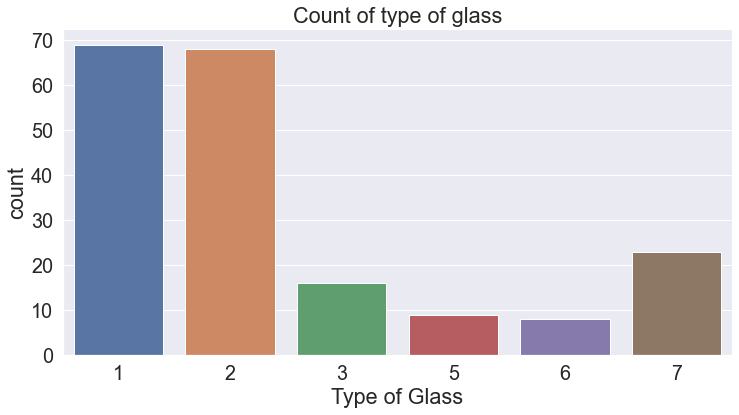

In [55]:
plt.subplots(figsize = (12,6))
sns.countplot(x='Type of Glass', data=df_new).set_title('Count of type of glass')

OBSERVATION:

Glass types 1 and 2 are almost occuring the same number of times but we can say that Glass type 1 has the highest number of occurence. While Glass type 6 has the least number of occurence

### Let's check the co-relation between each items for better understanding

<AxesSubplot:>

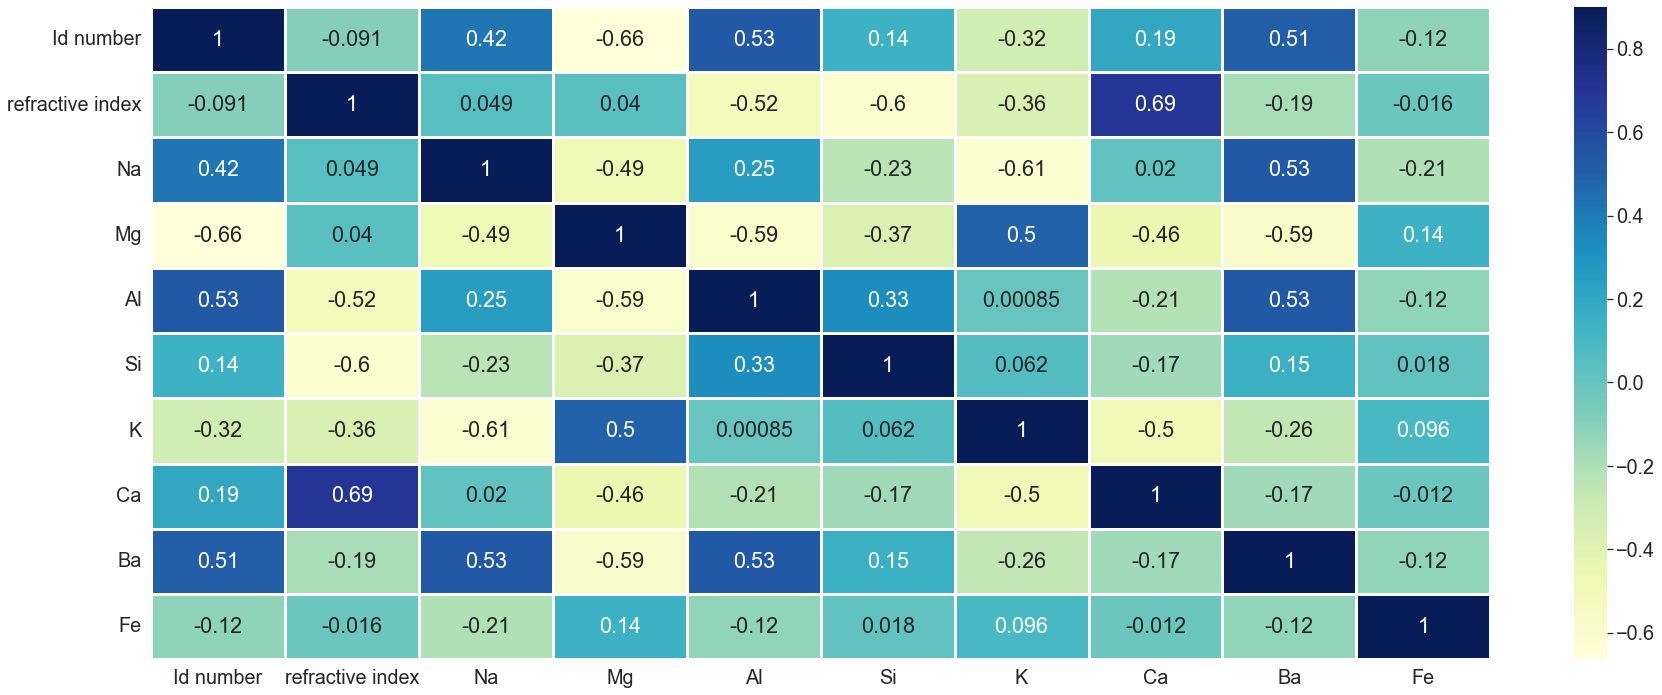

In [67]:
corr  = df_new[features].corr()
plt.figure(figsize=(30,12))
sns.heatmap(corr,annot=True,vmax=0.9,cmap='YlGnBu', linewidth=1.2)

Here we can see there is no multico-liearity among features (I am chossing a cut-off -> 0.9)

In [69]:
# Checking both mean and median. mean seemed more information
df_new.groupby('Type of Glass', as_index=False).mean()

,Type of Glass,Id number,refractive index,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,36.000000,1.518685,13.236522,3.538841,1.164783,72.631304,0.453043,8.797971,0.012899,0.057826
1,2,107.514706,1.517629,13.243676,3.301324,1.430147,72.693676,0.547353,8.539853,0.009853,0.069853
2,3,154.500000,1.517704,13.390000,3.528750,1.219375,72.470000,0.417500,8.760625,0.009375,0.037500
3,5,169.555556,1.520441,12.653333,0.641111,1.634444,73.056667,0.472222,11.350000,0.000000,0.031111
4,6,180.500000,1.518244,14.305000,1.468750,1.495000,72.931250,0.000000,9.695000,0.000000,0.000000
5,7,199.695652,1.516597,14.469565,0.503478,2.222174,73.078696,0.184783,8.503478,0.966087,0.016957


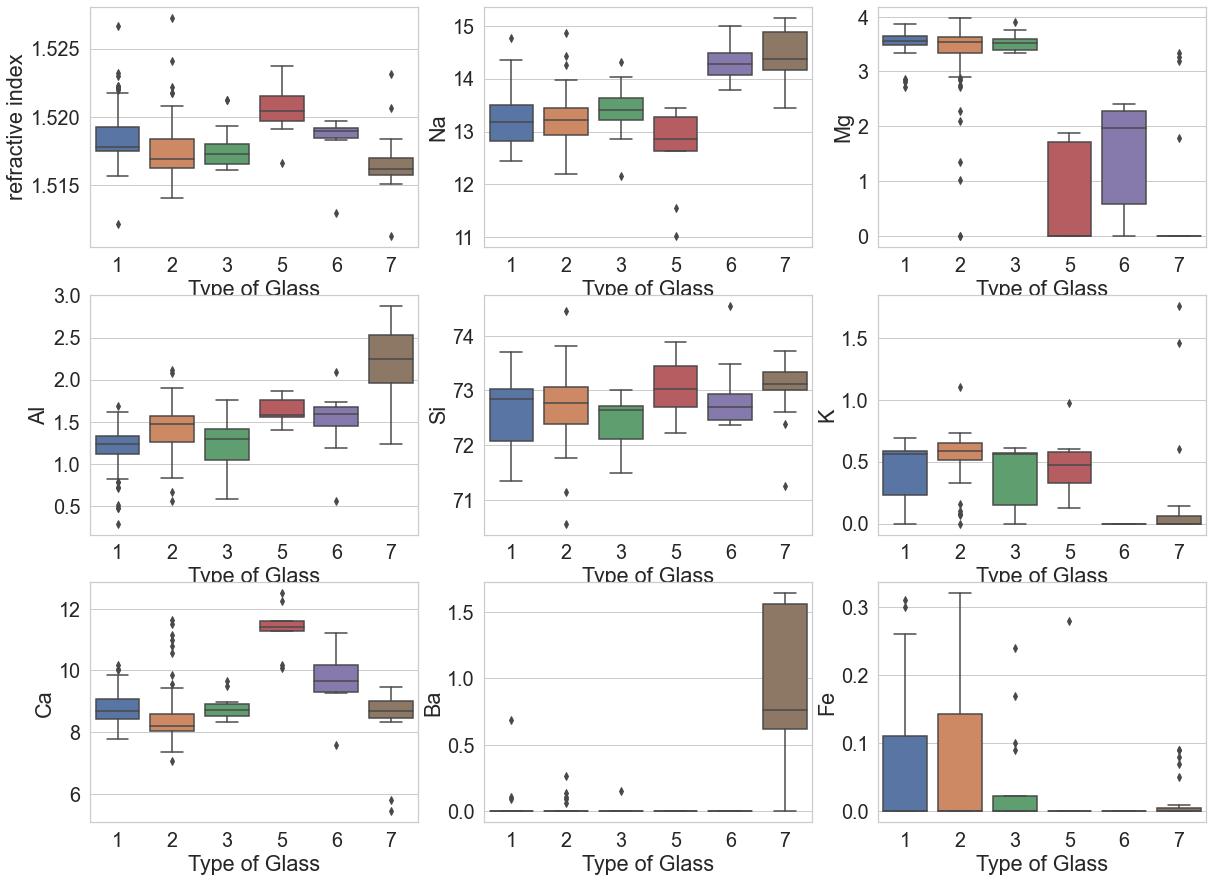

In [72]:
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type of Glass', y='refractive index', data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x='Type of Glass', y='Na', data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x='Type of Glass', y='Mg', data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x='Type of Glass', y='Al', data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x='Type of Glass', y='Si', data=df_new)
plt.subplot(3,3,6)
sns.boxplot(x='Type of Glass', y='K', data=df_new)
plt.subplot(3,3,7)
sns.boxplot(x='Type of Glass', y='Ca', data=df_new)
plt.subplot(3,3,8)
sns.boxplot(x='Type of Glass', y='Ba', data=df_new)
plt.subplot(3,3,9)
sns.boxplot(x='Type of Glass', y='Fe', data=df_new)
plt.show()

OBSERVATIONS:

1.The box plot shows that average Refractive index is similar for all types. Although, Type 5 has a wider range and slightly higher mean. 

2.Sodium content is higher in Type 6 & 7

3.Magnesium content is fairly high in Type 1, 2 & 3. 

4.Aluminium is higher in type 5 & 7. 

5.Silica does not provide much information to differentiate as it has the highest concentration amongst all the minerals but has similar range for all types. 

6.Potassium also doesn't provide much insight. But it's higher in type 5, containers, because K is used in toughened glass which are used to make pyrex items. 

7.Calcium is highest in type 5 and Barium in type 7. 

8.Iron is present in extremely low concentration, yet type 1, 2 & 3 have high values for some glasses than the rest. This is because Iron is added mainly in colored glasses.

We got some idea on which feature provides more insight in differentiating one type from another. Now, let's see the relationship between each one of them through a pairplot. (We will leave out K, Ba and Fe due to sparse concentration)

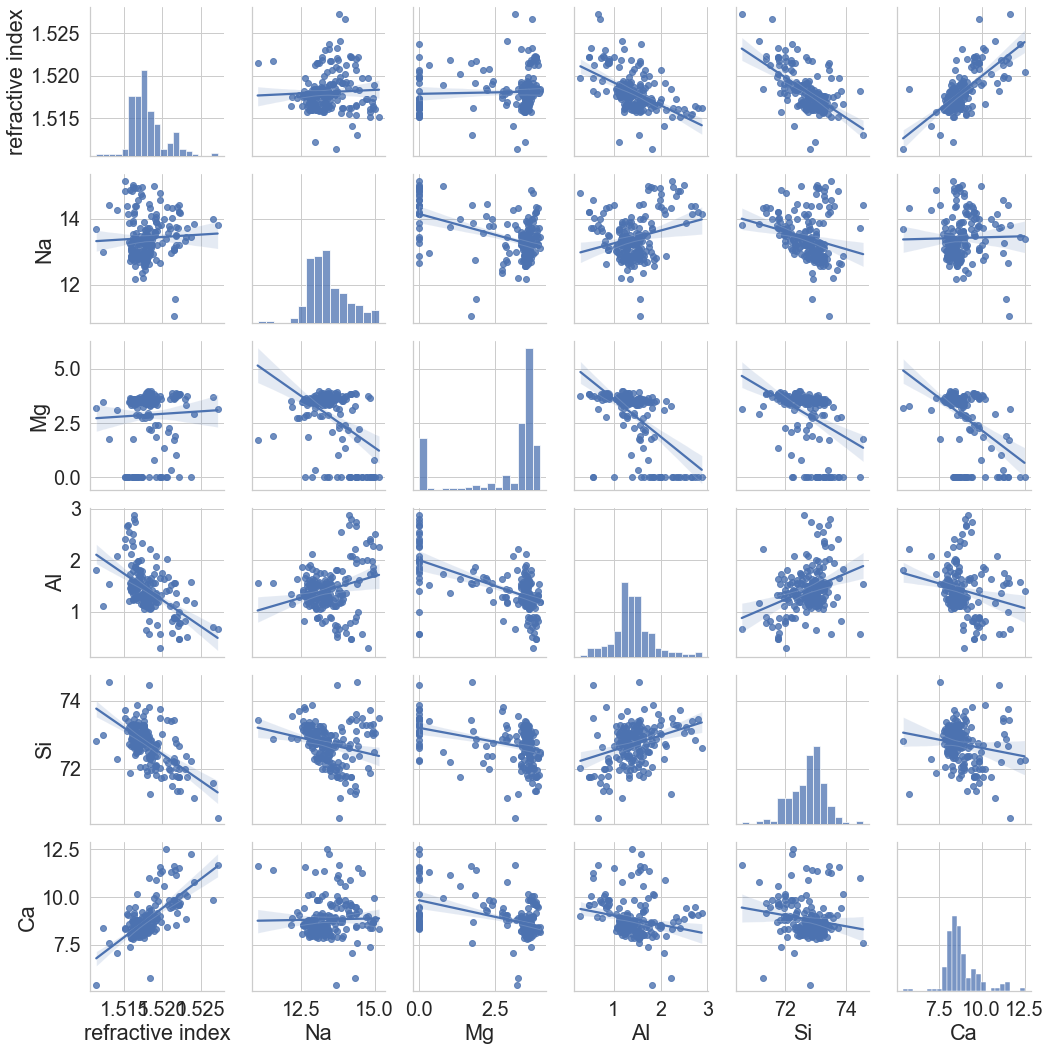

In [76]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(df_new[['refractive index','Na','Mg','Al','Si','Ca']], kind='reg')


On most dimensions, the points are scattered. But we can clearly see some strong relationship between Calcium and Refractive index. Silica and RI seem to have an inverse relationship.

## We get enough Information through EDA, now lets move to 'MODELLING'

In [80]:
#splitting our data into X and Y variables
x= df_new[features]
y = df_new['Type of Glass']

In [81]:
# Splitting the dataset into testing and training 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=25)

# Check whether the train and test have instances of all the glass types
print(np.unique(y_train))
print(np.unique(y_test))

[1 2 3 5 6 7]
[1 2 3 5 6 7]


In [88]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(x_train,y_train)
y_pred = svmMod.predict(x_test)
sc1 = metrics.accuracy_score(y_pred,y_test)

# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(x_train,y_train)
y_pred = gbmMod.predict(x_test)
sc2 = metrics.accuracy_score(y_pred,y_test)

# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(x_train, y_train)
y_pred = DecTree.predict(x_test)
sc3 = metrics.accuracy_score(y_pred,y_test)

# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(x_train, y_train)
y_pred = RandFor.predict(x_test)
sc4 = metrics.accuracy_score(y_pred,y_test)


In [89]:
print(DecTree.feature_importances_)
print(RandFor.feature_importances_)
print(gbmMod.feature_importances_)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.45350246 0.05606182 0.03086386 0.08386949 0.08729186 0.01526009
 0.0655492  0.07169141 0.12511636 0.01079345]
[0.87089431 0.00716465 0.00669793 0.00248452 0.01861523 0.00619416
 0.02158911 0.05389222 0.01246788 0.        ]


In [90]:
# Compare accuracy of models
pd.DataFrame([['Support Vector Machine',sc1],['Gradient Boost',sc2],
                             ['Decision Tree',sc3],['Random Forest',sc4]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.793103
1,Gradient Boost,0.982759
2,Decision Tree,0.965517
3,Random Forest,0.913793


Gradient boost gives the highest accuracy and all the features seem to be important from the other models. 